In [1]:
# Import packages & Load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 800)

df = pd.read_excel("eng_features.xlsx")
df.sort_values(by=['year','artist','track_name'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Fred Astaire,The Way You Look Tonight,1935,41,0.453,0.159,2,-11.474,1,0.0302,...,0.0869,0.180,75.682,audio_features,1ndRc8gZMyybqhTMhZjPot,spotify:track:1ndRc8gZMyybqhTMhZjPot,https://api.spotify.com/v1/tracks/1ndRc8gZMyyb...,https://api.spotify.com/v1/audio-analysis/1ndR...,188240,4
1,Elvis Presley,Jailhouse Rock,1958,73,0.647,0.582,10,-9.538,0,0.0755,...,0.0715,0.915,167.396,audio_features,4gphxUgq0JSFv2BCLhNDiE,spotify:track:4gphxUgq0JSFv2BCLhNDiE,https://api.spotify.com/v1/tracks/4gphxUgq0JSF...,https://api.spotify.com/v1/audio-analysis/4gph...,146480,4
2,Bobby Darin,Mack the Knife,1959,62,0.549,0.529,3,-12.291,0,0.1080,...,0.2060,0.464,82.755,audio_features,3E5ndyOfO6vFDEIE42HA8o,spotify:track:3E5ndyOfO6vFDEIE42HA8o,https://api.spotify.com/v1/tracks/3E5ndyOfO6vF...,https://api.spotify.com/v1/audio-analysis/3E5n...,184333,4
3,Elvis Presley,Can't Help Falling in Love,1961,78,0.396,0.293,2,-14.062,1,0.0275,...,0.1050,0.343,100.307,audio_features,44AyOl4qVkzS48vBsbNXaC,spotify:track:44AyOl4qVkzS48vBsbNXaC,https://api.spotify.com/v1/tracks/44AyOl4qVkzS...,https://api.spotify.com/v1/audio-analysis/44Ay...,182360,3
4,Ben E. King,Stand by Me,1962,78,0.650,0.306,9,-9.443,1,0.0393,...,0.0707,0.605,118.068,audio_features,3SdTKo2uVsxFblQjpScoHy,spotify:track:3SdTKo2uVsxFblQjpScoHy,https://api.spotify.com/v1/tracks/3SdTKo2uVsxF...,https://api.spotify.com/v1/audio-analysis/3SdT...,180056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,Keane,Spiralling,2020,12,0.628,0.924,8,-4.302,1,0.0549,...,0.1530,0.556,111.989,audio_features,2Qzdn8x0cSmuX25DxCeiTh,spotify:track:2Qzdn8x0cSmuX25DxCeiTh,https://api.spotify.com/v1/tracks/2Qzdn8x0cSmu...,https://api.spotify.com/v1/audio-analysis/2Qzd...,259427,4
2050,Rod Stewart,Da Ya Think I'm Sexy?,2020,1,0.724,0.658,2,-9.209,0,0.0269,...,0.1580,0.865,112.107,audio_features,0f96iUJUaByGg41Oa0pxRO,spotify:track:0f96iUJUaByGg41Oa0pxRO,https://api.spotify.com/v1/tracks/0f96iUJUaByG...,https://api.spotify.com/v1/audio-analysis/0f96...,329147,4
2051,Shaggy,Mr Boombastic,2020,44,0.860,0.708,2,-10.589,1,0.2900,...,0.3550,0.771,158.424,audio_features,7eYhN6ciVsXBfb7kVjmvgt,spotify:track:7eYhN6ciVsXBfb7kVjmvgt,https://api.spotify.com/v1/tracks/7eYhN6ciVsXB...,https://api.spotify.com/v1/audio-analysis/7eYh...,246413,4
2052,"TheSmartLocal, Adria Tham",Can You Feel It,2020,37,0.610,0.500,9,-7.808,1,0.0320,...,0.2600,0.350,94.947,audio_features,5Dj96GAC8wXfqKR4y8O8z5,spotify:track:5Dj96GAC8wXfqKR4y8O8z5,https://api.spotify.com/v1/tracks/5Dj96GAC8wXf...,https://api.spotify.com/v1/audio-analysis/5Dj9...,171937,4


<BarContainer object of 62 artists>

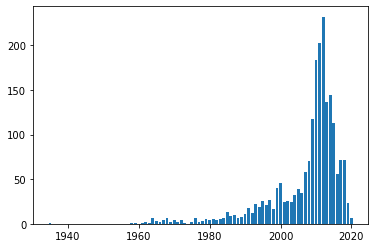

In [2]:
# Distribution by year
plt.bar(df.year.value_counts().index, df.year.value_counts().values)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


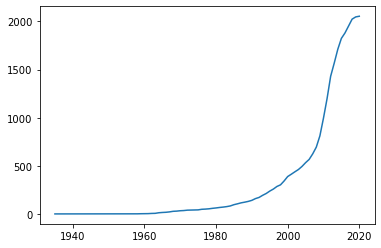

In [3]:
# Cumulative distribution across the years
df_year = df.year.value_counts().to_frame()
df_year.sort_index(axis=0, ascending=True, inplace=True)

df_year['year_cum'] = np.NaN
years = list(df_year.index)

for i, year in enumerate(years):
    if i==0:
        df_year['year_cum'][year] = df_year['year'][year]
    else:
        df_year['year_cum'][year] = df_year['year_cum'][years[i-1]] + df_year['year'][year]

plt.plot(list(df_year.index), df_year.year_cum)
plt.show()

In [4]:
# Pre-2000 songs
oldies = df[df['year']<=2003].copy()
oldies.reset_index(drop=True, inplace=True)
oldies

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Fred Astaire,The Way You Look Tonight,1935,41,0.453,0.1590,2,-11.474,1,0.0302,...,0.0869,0.1800,75.682,audio_features,1ndRc8gZMyybqhTMhZjPot,spotify:track:1ndRc8gZMyybqhTMhZjPot,https://api.spotify.com/v1/tracks/1ndRc8gZMyyb...,https://api.spotify.com/v1/audio-analysis/1ndR...,188240,4
1,Elvis Presley,Jailhouse Rock,1958,73,0.647,0.5820,10,-9.538,0,0.0755,...,0.0715,0.9150,167.396,audio_features,4gphxUgq0JSFv2BCLhNDiE,spotify:track:4gphxUgq0JSFv2BCLhNDiE,https://api.spotify.com/v1/tracks/4gphxUgq0JSF...,https://api.spotify.com/v1/audio-analysis/4gph...,146480,4
2,Bobby Darin,Mack the Knife,1959,62,0.549,0.5290,3,-12.291,0,0.1080,...,0.2060,0.4640,82.755,audio_features,3E5ndyOfO6vFDEIE42HA8o,spotify:track:3E5ndyOfO6vFDEIE42HA8o,https://api.spotify.com/v1/tracks/3E5ndyOfO6vF...,https://api.spotify.com/v1/audio-analysis/3E5n...,184333,4
3,Elvis Presley,Can't Help Falling in Love,1961,78,0.396,0.2930,2,-14.062,1,0.0275,...,0.1050,0.3430,100.307,audio_features,44AyOl4qVkzS48vBsbNXaC,spotify:track:44AyOl4qVkzS48vBsbNXaC,https://api.spotify.com/v1/tracks/44AyOl4qVkzS...,https://api.spotify.com/v1/audio-analysis/44Ay...,182360,3
4,Ben E. King,Stand by Me,1962,78,0.650,0.3060,9,-9.443,1,0.0393,...,0.0707,0.6050,118.068,audio_features,3SdTKo2uVsxFblQjpScoHy,spotify:track:3SdTKo2uVsxFblQjpScoHy,https://api.spotify.com/v1/tracks/3SdTKo2uVsxF...,https://api.spotify.com/v1/audio-analysis/3SdT...,180056,4
5,Roy Orbison,"Oh, Pretty Woman",1962,73,0.619,0.6030,9,-9.481,1,0.0342,...,0.0721,0.9580,127.432,audio_features,48i055G1OT5KxGGftwFxWy,spotify:track:48i055G1OT5KxGGftwFxWy,https://api.spotify.com/v1/tracks/48i055G1OT5K...,https://api.spotify.com/v1/audio-analysis/48i0...,178933,4
6,The Beatles,Love Me Do - Remastered 2009,1963,69,0.520,0.8290,0,-6.228,1,0.0806,...,0.2270,0.7440,147.997,audio_features,3VbGCXWRiouAq8VyMYN2MI,spotify:track:3VbGCXWRiouAq8VyMYN2MI,https://api.spotify.com/v1/tracks/3VbGCXWRiouA...,https://api.spotify.com/v1/audio-analysis/3VbG...,141693,4
7,Frank Sinatra,The Way You Look Tonight,1964,62,0.622,0.2400,5,-14.067,0,0.0363,...,0.1420,0.5870,132.234,audio_features,0elmUoU7eMPwZX1Mw1MnQo,spotify:track:0elmUoU7eMPwZX1Mw1MnQo,https://api.spotify.com/v1/tracks/0elmUoU7eMPw...,https://api.spotify.com/v1/audio-analysis/0elm...,202160,4
8,Little Anthony & The Imperials,Goin' Out Of My Head,1964,42,0.542,0.2610,9,-12.231,1,0.0321,...,0.4710,0.4380,104.464,audio_features,538IUnkjiDgU9Ndhf1wN2f,spotify:track:538IUnkjiDgU9Ndhf1wN2f,https://api.spotify.com/v1/tracks/538IUnkjiDgU...,https://api.spotify.com/v1/audio-analysis/538I...,149733,4
9,The Beatles,A Hard Day's Night - Remastered 2009,1964,68,0.590,0.8050,0,-6.481,1,0.0371,...,0.0996,0.7970,138.514,audio_features,5J2CHimS7dWYMImCHkEFaJ,spotify:track:5J2CHimS7dWYMImCHkEFaJ,https://api.spotify.com/v1/tracks/5J2CHimS7dWY...,https://api.spotify.com/v1/audio-analysis/5J2C...,154200,4


In [5]:
# Songs in the 2000s
song_2000s = df[(df['year']>=2004)&(df['year']<=2011)].copy()
song_2000s.reset_index(drop=True, inplace=True)
song_2000s

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Avril Lavigne,My Happy Ending,2004,68,0.414,0.936,2,-2.407,1,0.0758,...,0.3690,0.7400,170.229,audio_features,6sqNctd7MlJoKDOxPVCAvU,spotify:track:6sqNctd7MlJoKDOxPVCAvU,https://api.spotify.com/v1/tracks/6sqNctd7MlJo...,https://api.spotify.com/v1/audio-analysis/6sqN...,242413,4
1,"Bill Medley, Jennifer Warnes","(I've Had) The Time of My Life - From ""Dirty D...",2004,71,0.700,0.781,6,-8.255,0,0.0507,...,0.0590,0.3850,108.695,audio_features,4BFMQ15vXr626UOoZL8bUI,spotify:track:4BFMQ15vXr626UOoZL8bUI,https://api.spotify.com/v1/tracks/4BFMQ15vXr62...,https://api.spotify.com/v1/audio-analysis/4BFM...,289067,4
2,Blue,All Rise,2004,57,0.738,0.692,5,-4.349,0,0.0315,...,0.1260,0.9400,97.990,audio_features,0OJtYfqiz0Xn53o2TnySQC,spotify:track:0OJtYfqiz0Xn53o2TnySQC,https://api.spotify.com/v1/tracks/0OJtYfqiz0Xn...,https://api.spotify.com/v1/audio-analysis/0OJt...,224133,4
3,Blue,U Make Me Wanna,2004,53,0.599,0.714,7,-6.824,1,0.0328,...,0.1290,0.8590,158.021,audio_features,7HErXvltYDqTUVcOCPmfDz,spotify:track:7HErXvltYDqTUVcOCPmfDz,https://api.spotify.com/v1/tracks/7HErXvltYDqT...,https://api.spotify.com/v1/audio-analysis/7HEr...,221773,4
4,"Blue, Elton John",Sorry Seems To Be The Hardest Word,2004,57,0.564,0.600,7,-6.814,0,0.0305,...,0.3800,0.4420,78.955,audio_features,6F9jdzX7CfixvCsCkW7zw9,spotify:track:6F9jdzX7CfixvCsCkW7zw9,https://api.spotify.com/v1/tracks/6F9jdzX7Cfix...,https://api.spotify.com/v1/audio-analysis/6F9j...,210067,4
5,Green Day,American Idiot,2004,78,0.380,0.988,1,-2.042,1,0.0639,...,0.3680,0.7690,186.113,audio_features,6nTiIhLmQ3FWhvrGafw2zj,spotify:track:6nTiIhLmQ3FWhvrGafw2zj,https://api.spotify.com/v1/tracks/6nTiIhLmQ3FW...,https://api.spotify.com/v1/audio-analysis/6nTi...,176346,4
6,Green Day,Holiday / Boulevard of Broken Dreams,2004,70,0.290,0.827,8,-3.451,1,0.0362,...,0.3010,0.4500,167.086,audio_features,0MsrWnxQZxPAcov7c74sSo,spotify:track:0MsrWnxQZxPAcov7c74sSo,https://api.spotify.com/v1/tracks/0MsrWnxQZxPA...,https://api.spotify.com/v1/audio-analysis/0Msr...,493400,4
7,Green Day,Wake Me up When September Ends,2004,76,0.546,0.814,7,-5.146,1,0.0314,...,0.0972,0.1460,104.980,audio_features,3ZffCQKLFLUvYM59XKLbVm,spotify:track:3ZffCQKLFLUvYM59XKLbVm,https://api.spotify.com/v1/tracks/3ZffCQKLFLUv...,https://api.spotify.com/v1/audio-analysis/3Zff...,285653,4
8,Gwen Stefani,Cool,2004,57,0.709,0.721,2,-3.520,1,0.0281,...,0.3550,0.8010,112.019,audio_features,4QvTOAIVxL3NGgrIYU97pj,spotify:track:4QvTOAIVxL3NGgrIYU97pj,https://api.spotify.com/v1/tracks/4QvTOAIVxL3N...,https://api.spotify.com/v1/audio-analysis/4QvT...,189333,4
9,Gwen Stefani,Hollaback Girl,2004,68,0.926,0.916,10,-2.221,0,0.0929,...,0.0234,0.9040,110.007,audio_features,0LzrhCZFXW94Y8nwtTuRlw,spotify:track:0LzrhCZFXW94Y8nwtTuRlw,https://api.spotify.com/v1/tracks/0LzrhCZFXW94...,https://api.spotify.com/v1/audio-analysis/0Lzr...,199853,4


In [6]:
# Songs in the 2010s
song_2010s = df[(df['year']>=2012)&(df['year']<=2014)].copy()
song_2010s.reset_index(drop=True, inplace=True)
song_2010s

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Adam Lambert,Better Than I Know Myself,2012,50,0.484,0.8120,10,-4.743,1,0.1380,...,0.1800,0.3080,109.452,audio_features,3Fsjt1h1p2o86pC2lQopJc,spotify:track:3Fsjt1h1p2o86pC2lQopJc,https://api.spotify.com/v1/tracks/3Fsjt1h1p2o8...,https://api.spotify.com/v1/audio-analysis/3Fsj...,216173,5
1,Adam Lambert,Never Close Our Eyes,2012,48,0.516,0.8130,3,-4.711,1,0.0664,...,0.7310,0.6080,134.998,audio_features,3GDX2vk9Omok7DDvg7vOpq,spotify:track:3GDX2vk9Omok7DDvg7vOpq,https://api.spotify.com/v1/tracks/3GDX2vk9Omok...,https://api.spotify.com/v1/audio-analysis/3GDX...,248453,4
2,Adele,Skyfall,2012,73,0.346,0.5520,0,-6.864,0,0.0282,...,0.1140,0.0789,75.881,audio_features,6VObnIkLVruX4UVyxWhlqm,spotify:track:6VObnIkLVruX4UVyxWhlqm,https://api.spotify.com/v1/tracks/6VObnIkLVruX...,https://api.spotify.com/v1/audio-analysis/6VOb...,286480,4
3,Alicia Keys,Girl on Fire,2012,76,0.482,0.7060,9,-5.762,1,0.0609,...,0.1050,0.1440,92.494,audio_features,4esOae7i4rqTbAu9o5Pxco,spotify:track:4esOae7i4rqTbAu9o5Pxco,https://api.spotify.com/v1/tracks/4esOae7i4rqT...,https://api.spotify.com/v1/audio-analysis/4esO...,224920,4
4,All Time Low,Backseat Serenade,2012,48,0.512,0.9650,6,-3.700,1,0.0456,...,0.1910,0.4830,140.070,audio_features,0WKIGF4Bm3YdjIq4n0ID9x,spotify:track:0WKIGF4Bm3YdjIq4n0ID9x,https://api.spotify.com/v1/tracks/0WKIGF4Bm3Yd...,https://api.spotify.com/v1/audio-analysis/0WKI...,201076,4
5,All Time Low,For Baltimore,2012,37,0.363,0.9520,11,-4.153,1,0.0664,...,0.0887,0.4600,166.727,audio_features,4bKE8zuzZg8e3fNdpK7QY9,spotify:track:4bKE8zuzZg8e3fNdpK7QY9,https://api.spotify.com/v1/tracks/4bKE8zuzZg8e...,https://api.spotify.com/v1/audio-analysis/4bKE...,188992,4
6,All Time Low,Somewhere in Neverland,2012,45,0.572,0.9830,8,-2.848,1,0.0828,...,0.3120,0.5520,127.968,audio_features,4o030RTUiWEbE1x3IIMbKh,spotify:track:4o030RTUiWEbE1x3IIMbKh,https://api.spotify.com/v1/tracks/4o030RTUiWEb...,https://api.spotify.com/v1/audio-analysis/4o03...,225293,4
7,B.o.B,So Good,2012,65,0.660,0.9000,7,-5.020,1,0.1400,...,0.2190,0.5910,85.510,audio_features,28GUjBGqZVcAV4PHSYzkj2,spotify:track:28GUjBGqZVcAV4PHSYzkj2,https://api.spotify.com/v1/tracks/28GUjBGqZVcA...,https://api.spotify.com/v1/audio-analysis/28GU...,213253,4
8,"B.o.B, Taylor Swift",Both of Us (feat. Taylor Swift),2012,57,0.677,0.7220,7,-7.088,1,0.0522,...,0.2070,0.0483,125.091,audio_features,3r9bgSJlJz2zlevcBRYXko,spotify:track:3r9bgSJlJz2zlevcBRYXko,https://api.spotify.com/v1/tracks/3r9bgSJlJz2z...,https://api.spotify.com/v1/audio-analysis/3r9b...,216120,4
9,"Birdy, Mumford & Sons",Learn Me Right,2012,43,0.209,0.6050,2,-9.463,1,0.0313,...,0.3040,0.2660,68.514,audio_features,7JWIKtAToWqvAl1qlpsjlC,spotify:track:7JWIKtAToWqvAl1qlpsjlC,https://api.spotify.com/v1/tracks/7JWIKtAToWqv...,https://api.spotify.com/v1/audio-analysis/7JWI...,225987,4


In [7]:
# Songs Post-2015
new_pop =  df[df['year']>=2015].copy()
new_pop.reset_index(drop=True, inplace=True)
new_pop

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5 Seconds of Summer,Hey Everybody!,2015,53,0.753,0.803,9,-3.737,1,0.0316,...,0.1010,0.8530,126.017,audio_features,3ylFvJfARlPKxGWAJv6Bvf,spotify:track:3ylFvJfARlPKxGWAJv6Bvf,https://api.spotify.com/v1/tracks/3ylFvJfARlPK...,https://api.spotify.com/v1/audio-analysis/3ylF...,196937,4
1,Adam Lambert,Another Lonely Night,2015,48,0.447,0.670,11,-6.106,1,0.0712,...,0.0687,0.1170,181.387,audio_features,7kOJsVkJXvLQPQ9osGWeKd,spotify:track:7kOJsVkJXvLQPQ9osGWeKd,https://api.spotify.com/v1/tracks/7kOJsVkJXvLQ...,https://api.spotify.com/v1/audio-analysis/7kOJ...,225800,3
2,Alan Walker,Faded,2015,76,0.589,0.651,6,-5.097,1,0.0306,...,0.1110,0.1660,90.011,audio_features,7gHs73wELdeycvS48JfIos,spotify:track:7gHs73wELdeycvS48JfIos,https://api.spotify.com/v1/tracks/7gHs73wELdey...,https://api.spotify.com/v1/audio-analysis/7gHs...,212627,4
3,"Alesso, Roy English",Cool,2015,59,0.537,0.848,6,-2.431,0,0.0313,...,0.4230,0.4980,128.023,audio_features,2ToIksTPpJ4csKPEOdUEyM,spotify:track:2ToIksTPpJ4csKPEOdUEyM,https://api.spotify.com/v1/tracks/2ToIksTPpJ4c...,https://api.spotify.com/v1/audio-analysis/2ToI...,221400,4
4,"Alesso, Sirena",Sweet Escape,2015,56,0.572,0.839,2,-3.865,1,0.0397,...,0.1970,0.5160,126.029,audio_features,6vPJvkEuWZPcv58NnQ3dBR,spotify:track:6vPJvkEuWZPcv58NnQ3dBR,https://api.spotify.com/v1/tracks/6vPJvkEuWZPc...,https://api.spotify.com/v1/audio-analysis/6vPJ...,232533,4
5,"Alesso, Tove Lo",Heroes (we could be),2015,71,0.503,0.748,5,-4.124,1,0.0619,...,0.3430,0.3560,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
6,"Audien, Lady A",Something Better,2015,52,0.549,0.835,2,-2.632,1,0.0656,...,0.2120,0.4230,126.080,audio_features,33lXq3csEWwYNn6x0sM3Et,spotify:track:33lXq3csEWwYNn6x0sM3Et,https://api.spotify.com/v1/tracks/33lXq3csEWwY...,https://api.spotify.com/v1/audio-analysis/33lX...,212619,4
7,Avicii,Waiting For Love,2015,78,0.579,0.736,6,-3.863,0,0.0527,...,0.1980,0.6130,127.999,audio_features,2P4OICZRVAQcYAV2JReRfj,spotify:track:2P4OICZRVAQcYAV2JReRfj,https://api.spotify.com/v1/tracks/2P4OICZRVAQc...,https://api.spotify.com/v1/audio-analysis/2P4O...,230613,4
8,Ben Rector,Brand New,2015,64,0.555,0.933,9,-5.040,1,0.1130,...,0.1220,0.4210,144.874,audio_features,3IpG4SvqxHmbZslvDSIIZP,spotify:track:3IpG4SvqxHmbZslvDSIIZP,https://api.spotify.com/v1/tracks/3IpG4SvqxHmb...,https://api.spotify.com/v1/audio-analysis/3IpG...,243933,4
9,Carly Rae Jepsen,I Really Like You,2015,65,0.622,0.808,5,-4.701,1,0.0418,...,0.2150,0.5990,122.121,audio_features,0PGLRTN0X6DrXh645WJCIY,spotify:track:0PGLRTN0X6DrXh645WJCIY,https://api.spotify.com/v1/tracks/0PGLRTN0X6Dr...,https://api.spotify.com/v1/audio-analysis/0PGL...,204773,4
